필수 라이브러리 다운
-
### 주요 라이브러리
#### FinanceDataReader : 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
#### BeaurifulSoup, Requests : 페이지 크롤링 필수 라이브러리
#### matplotlib : 시각화 라이브러리
#### pandas, numpy : 데이터 정제를 위한 라이브러리
### 추가 설정
#### matplotlib 폰트 설정

In [1]:
import FinanceDataReader as fdr
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns

fname = 'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=fname).get_name()
matplotlib.rc('font', family = font_name)

주식 데이터 다운
-
### 함수 설명
#### download_stockdata() : 주식 거래소의 주가 정보 다운로드
#### get_stockdata() : 다운받은 주가 정보에서 np.nan값을 0으로 변환하여 리턴

In [2]:
def get_stockdata(stock_code):
    global stock_data
    # 개장하지 않은 날 0인 데이터를 전 날 데이터로 채움
    stock_data[stock_code].replace(0,np.nan,inplace=True)
    stock_data[stock_code] = stock_data[stock_code].ffill()
    return stock_data[stock_code]

stock = {}
with open('네이버증권_반도체종목.txt','r', encoding='UTF-8') as f:
  lines = f.readlines()
  for idx, line in enumerate(lines[::6]):
    stock[line.strip()] = lines[idx*6+1].strip()

stock_data = {}
def downlaod_stockdata():
  global stock_data
  for value in stock.values():
    df = fdr.DataReader(value)
    stock_data[value] = df

krx = fdr.StockListing('KRX')
downlaod_stockdata()

{'자람테크놀로지': '389020', 'GST': '083450', '시그네틱스': '033170', '넥스트칩': '396270', '엑시콘': '092870', '유니테스트': '086390', '테크윙': '089030', '유니셈': '036200', '티이엠씨': '425040', '한솔아이원스': '114810', '에이직랜드': '445090', '큐엠씨': '136660', '타이거일렉': '219130', '네패스아크': '330860', '텔레칩스': '054450', '와이아이케이': '232140', '티엘비': '356860', '큐알티': '405100', '지앤비에스 에코': '382800', '퀄리타스반도체': '432720', '예스티': '122640', '네오셈': '253590', '디아이': '003160', '코스텍시스템': '169670', '제우스': '079370', '아이텍': '119830', '하나마이크론': '067310', '에프에스티': '036810', '에이디테크놀로지': '200710', '미래산업': '025560', '유니퀘스트': '077500', '피에스케이': '319660', 'ISC': '095340', '아이엠티': '451220', '그린리소스': '402490', '코미코': '183300', '가온칩스': '399720', '엠케이전자': '033160', '신성이엔지': '011930', '디엔에프': '092070', '다원넥스뷰': '323350', '티씨케이': '064760', '티엘엔지니어링': '413300', '두산테스나': '131970', '아진엑스텍': '059120', '로체시스템즈': '071280', 'KEC': '092220', '오션브릿지': '241790', '제이엔비': '452160', '지오엘리먼트': '311320', '에이엘티': '172670', '네패스': '033640', '오픈엣지테크놀로지': '394280', '워트': '39647

heatmap 제작
-
### 종목 코드 입력
    company_code = input("code input(ex: A123456): ")
### 코드와 일치하는 csv파일 읽어 raw_data에 저장
    raw_data = pd.read_csv('./data_csv/'+company_code+'.csv')
### 코드와 일치하는 주가데이터 파일을 읽어 selected_stock_data에 저장
    selected_stock_data = get_stockdata(company_code[1:])
> company_code[1:] : get_stockdata()는 코드의 숫자부분을 인자로 받는다. 따라서 company_code의 첫부분('A')를 제외한 숫자부분만 인자로 넣는다.
### 분기별 주가 데이터 추출
    tmp = []
    for i in raw_data['net quarter']:
        price_data = selected_stock_data[i+'/01':i+'/01']['Close'].values
        if len(price_data) > 0:
            tmp.append(int(price_data[0]))
        else:
            tmp.append(0)   
### 읽어온 raw_data에 추출하누 주가 데이터 추가
    raw_data['stock'] = tmp
    raw_data['stock'] = raw_data['stock'].astype(object)
### raw_data을 정제하여 refine_data에 저장
    if 'net quarter' in raw_data.columns:
        del temp_refine['net quarter']
        
    refine_data = raw_data.replace({',': ''}, regex=True)
    refine_data = raw_data.astype(float)
    
    refine_datae.columns = ['매출액', '영업이익', '영업이익(발표기준)', '당기순이익', '자산총계', '부채총계', '자본총계', '자본금', '부채비율(%)', '유보율(%)', '영업이익률(%)', '순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS', 'BPS', 'DPS', 'PER', 'PBR', '발행주식수', '배당수익률', '주가']
1. 'net quarter'의 데이터는 'yyyy/mm'형식으로, 계산이 불가함 -> 열 삭제
2. 라벨 이름 변경
### 상관관계 연산
    correlation_matrix=temp_refine.corr()
### 연산 결과를 바탕으로 heatmap 제작
    plt.figure(figsize=(13, 13))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45)
    plt.show()

code input(ex: A123456):  A102120


C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


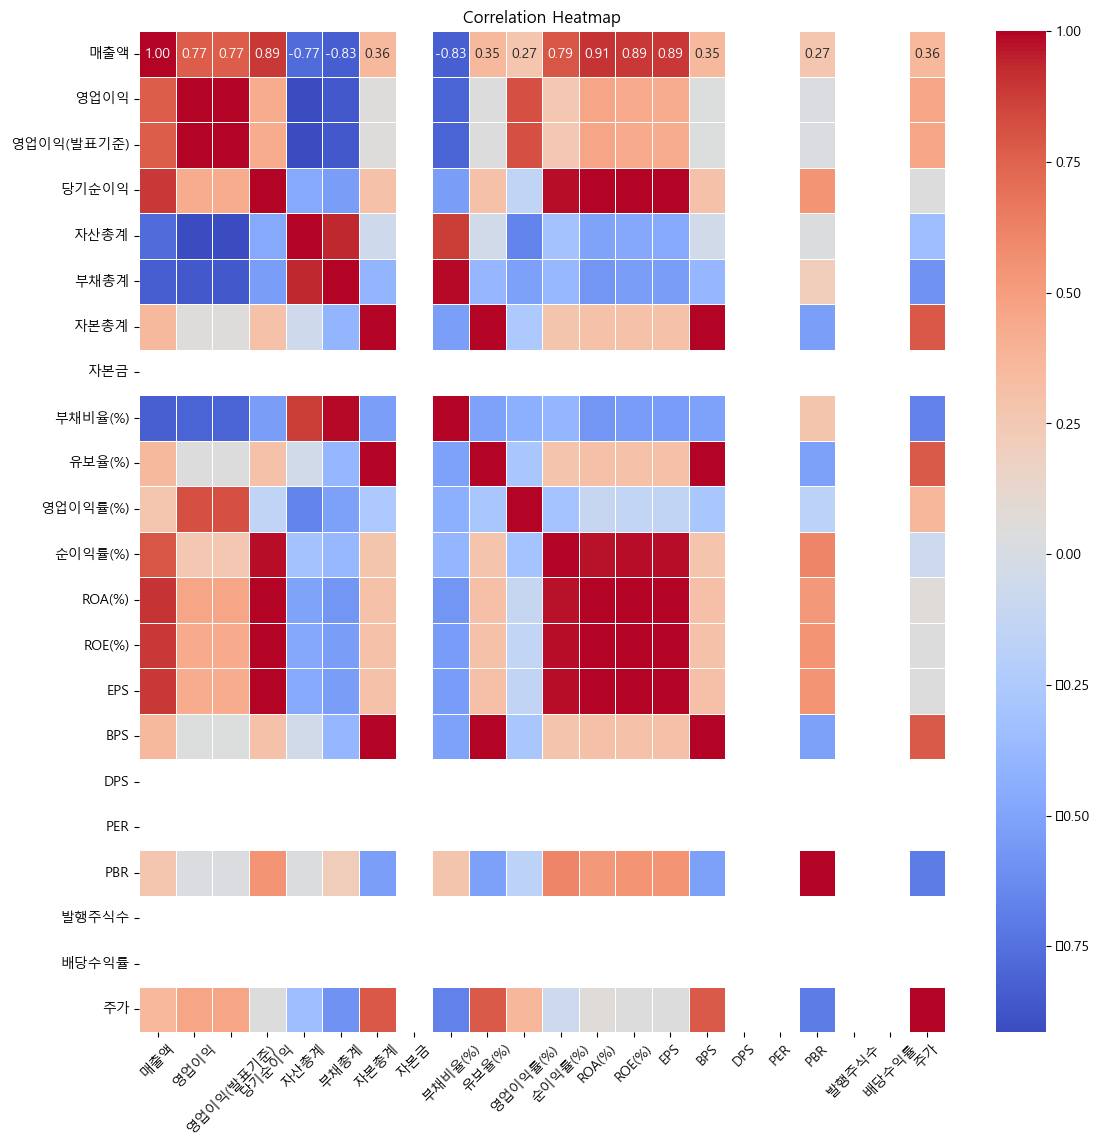

In [3]:
company_code = input("code input(ex: A123456): ")
raw_data = []
raw_data = pd.read_csv('./data_csv/'+company_code+'.csv')
selected_stock_data = get_stockdata(company_code[1:])
tmp = []
for i in raw_data['net quarter']:
    price_data = selected_stock_data[i+'/01':i+'/01']['Close'].values
    if len(price_data) > 0:
        tmp.append(int(price_data[0]))
    else:
        tmp.append(0)

raw_data['stock'] = tmp
raw_data['stock'] = raw_data['stock'].astype(object) 
if 'net quarter' in raw_data.columns:
    del raw_data['net quarter']
    
refine_data = raw_data.replace({',': ''}, regex=True)
            
refine_data.columns = ['매출액', '영업이익', '영업이익(발표기준)', '당기순이익', '자산총계', '부채총계', '자본총계', '자본금', '부채비율(%)', '유보율(%)', '영업이익률(%)', '순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS', 'BPS', 'DPS', 'PER', 'PBR', '발행주식수', '배당수익률', '주가']
correlation_matrix=refine_data.corr()
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()